<a href="https://colab.research.google.com/github/ZichenLiu123/DataAnalysisStocks/blob/main/Assignment_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Q1

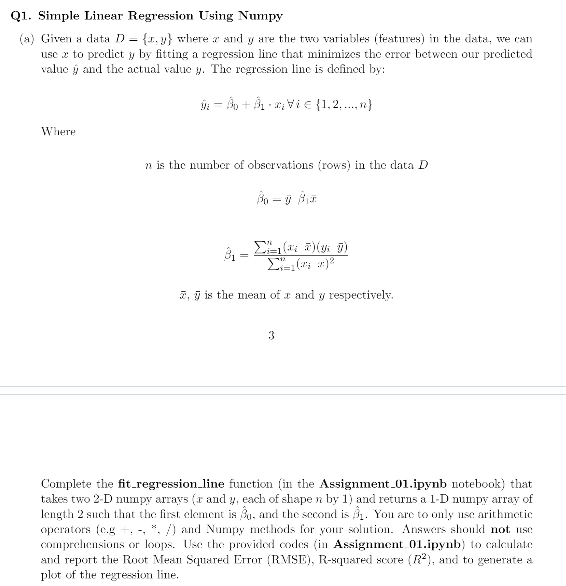

In [ ]:
# Do NOT modify this block of code

import numpy as np
import numpy.typing as npt
import matplotlib.pyplot as plt

In [ ]:
# Do NOT modify this block of code
n = 200

rand_x = np.random.RandomState(0)
x = rand_x.randint(1, 100, (n, 1))
rand_noise = np.random.RandomState(10)
y = 2.13 * x - 50.84 + 10*rand_noise.randn(n, 1)

In [ ]:
def fit_regression_line(x: npt.NDArray[np.float64], y: npt.NDArray[np.float64]) -> npt.NDArray[np.float64]:

    ## Your code starts here ##
    mean_x = np.mean(x)
    mean_y = np.mean(y)

    beta_1 = np.sum((x - mean_x) * (y - mean_y)) / np.sum((x - mean_x) ** 2)

    beta_0 = mean_y - beta_1 * mean_x
    ## end ##

    return np.array([beta_0, beta_1])

In [ ]:
# Do NOT modify this block of code.
# If this code cell run without any 'AssertionError', then your function 'fit_regression_line' is returning a numpy array with the correct shape.
assert fit_regression_line(x, y).shape == (2, )

In [ ]:
# Do NOT modify this block of code
def rmse(x: npt.NDArray[np.float64], y: npt.NDArray[np.float64]) -> np.float64:
    beta_0, beta_1 = fit_regression_line(x, y)

    y_hat = beta_1 * x + beta_0

    return np.sqrt(np.mean((y - y_hat)**2))

print(f"RMSE score is: {np.round(rmse(x, y), 4)}")

RMSE score is: 9.7621


In [ ]:
# Do NOT modify this block of code
def r_squared(x: npt.NDArray[np.float64], y: npt.NDArray[np.float64]) -> np.float64:
    beta_0, beta_1 = fit_regression_line(x, y)

    y_hat = beta_1 * x + beta_0

    return (np.corrcoef(y_hat, y, rowvar=False)[0, 1])**2

print(f"R-Squared score is: {np.round(r_squared(x, y), 4)}")

R-Squared score is: 0.9737


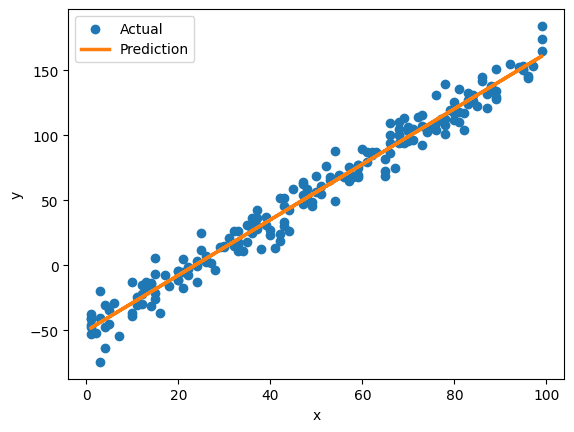

In [ ]:
# Do NOT modify this block of code
def plot_predictions(x: npt.NDArray[np.float64], y: npt.NDArray[np.float64]) -> None:
    beta_0, beta_1 = fit_regression_line(x, y)

    y_hat = beta_1 * x + beta_0

    plt.scatter(x.flatten(), y.flatten(), color=plt.cm.tab10(0), label='Actual')
    plt.plot(x.flatten(), y_hat.flatten(), color=plt.cm.tab10(1), linewidth=2.5, label='Prediction')

    plt.legend()
    plt.xlabel("x")
    plt.ylabel("y")

    plt.show()

plot_predictions(x, y)

In [ ]:
# Do NOT modify this block of code

import pandas as pd

## Q2(a)

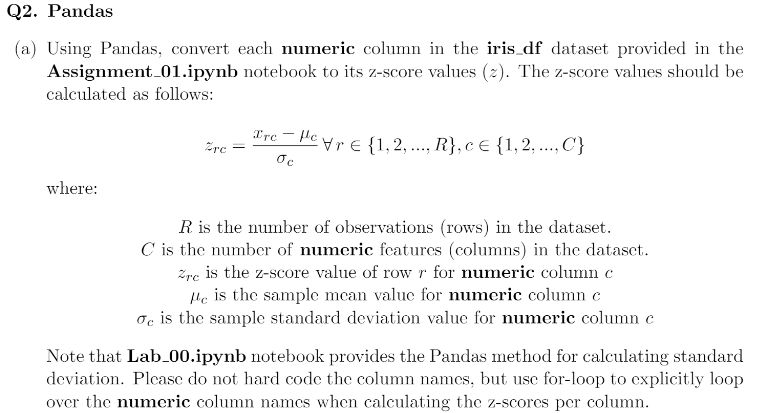

In [ ]:
# Do NOT modify this block of code

import seaborn as sns

iris_df = sns.load_dataset('iris')
print(iris_df.shape)

(150, 5)


In [ ]:
## Your code starts here ##
for column in iris_df.select_dtypes(include='number').columns:
    col_mean = iris_df[column].mean()
    col_std = iris_df[column].std()
    iris_df[column] = (iris_df[column] - col_mean) / col_std
iris_df
## end ##

,sepal_length,sepal_width,petal_length,petal_width,species
0,-0.897674,1.015602,-1.335752,-1.311052,setosa
1,-1.139200,-0.131539,-1.335752,-1.311052,setosa
2,-1.380727,0.327318,-1.392399,-1.311052,setosa
3,-1.501490,0.097889,-1.279104,-1.311052,setosa
4,-1.018437,1.245030,-1.335752,-1.311052,setosa
...,...,...,...,...,...
145,1.034539,-0.131539,0.816859,1.443994,virginica
146,0.551486,-1.278680,0.703564,0.919223,virginica
147,0.793012,-0.131539,0.816859,1.050416,virginica
148,0.430722,0.786174,0.930154,1.443994,virginica


## Q2(b)

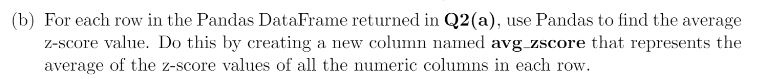

In [ ]:
## Your code starts here ##
num_cols = iris_df.select_dtypes(include='number')
iris_df['avg_zscore'] = num_cols.mean(axis=1)
iris_df
## end ##

,sepal_length,sepal_width,petal_length,petal_width,species,avg_zscore
0,-0.897674,1.015602,-1.335752,-1.311052,setosa,-0.632219
1,-1.139200,-0.131539,-1.335752,-1.311052,setosa,-0.979386
2,-1.380727,0.327318,-1.392399,-1.311052,setosa,-0.939215
3,-1.501490,0.097889,-1.279104,-1.311052,setosa,-0.998439
4,-1.018437,1.245030,-1.335752,-1.311052,setosa,-0.605053
...,...,...,...,...,...,...
145,1.034539,-0.131539,0.816859,1.443994,virginica,0.790963
146,0.551486,-1.278680,0.703564,0.919223,virginica,0.223898
147,0.793012,-0.131539,0.816859,1.050416,virginica,0.632187
148,0.430722,0.786174,0.930154,1.443994,virginica,0.897761


## Q2(c)

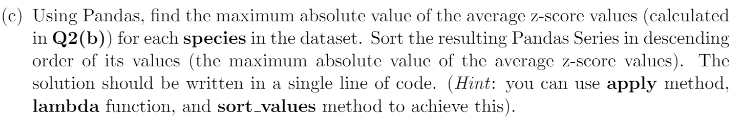

In [ ]:
## Your code starts here ##
iris_df.groupby('species')['avg_zscore'].apply(lambda x: x.abs().max()).sort_values(ascending=False)
## end ##

species
virginica     1.731358
setosa        1.483012
versicolor    0.962980
Name: avg_zscore, dtype: float64